<!DOCTYPE html>
<html>
<head>
  <title>dropouts Outcomes Prediction Project</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
    }
    h1 {
      color: #333;
    }
    p {
      color: #666;
    }
  </style>
</head>
<body>

<h1>Dropout Outcomes Prediction Project</h1>

<p>Welcome to the Educational Outcomes Prediction Project. In this project, we aim to analyze and predict educational outcomes, particularly focusing on dropout rates and other relevant metrics. The project involves the application of various machine learning techniques to understand the factors influencing educational outcomes and develop predictive models to identify at-risk students.</p>

<p><strong>Project Objectives:</strong></p>
<ul>
  <li>Explore the dataset related to student enrollment, graduation, dropout rates, and other educational metrics.</li>
  <li>Preprocess the data to handle missing values, encode categorical variables, and prepare it for modeling.</li>
  <li>Perform exploratory data analysis (EDA) to gain insights into the relationships between different features and educational outcomes.</li>
  <li>Select appropriate features and build predictive models using techniques such as Poisson regression, Negative Binomial regression, and multiple linear regression.</li>
  <li>Evaluate the performance of the models and interpret the results to understand the factors influencing educational outcomes.</li>
  
</ul>

<p><strong>Dataset:</strong> The dataset contains information on student enrollment, graduation counts, dropout counts, and other educational metrics. It also includes demographic information such as county codes, subgroup codes, and other relevant features.</p>

<p>Let's begin by exploring the dataset and preparing it for analysis.</p>

</body>
</html>


<b> link to video </b>
https://screenpal.com/watch/cZnTFgVKoeR

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix

In [31]:

from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [3]:
#loading the data from my own github repo
# Loading Data from Github

# Loading Data from Github

url0 = "https://github.com/vidhika-git/DAV-6150/blob/main/project1/Project1_Data.csv?raw=true"


# Reading Data via pd.read_csv
df = pd.read_csv(url0)

# Displaying first 10 rows of the data
df.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,33,10%,141,42%,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,42,11%,183,50%,23,6%,10,3%,18,5%,0,0%,91,25%


In [4]:
df.shape  #check the shape

(73152, 29)

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [117]:
df.duplicated().value_counts()  #check for duplicates

False    39674
dtype: int64

In [7]:
df['dropout_cnt'].value_counts()   #

-       33478
0        7593
1        6271
2        4296
3        3257
4        2550
5        1908
6        1477
7        1182
8         962
9         774
10        609
11        572
12        527
13        426
14        390
15        340
16        289
17        264
19        264
18        229
20        205
21        169
24        163
22        160
23        149
25        143
26        130
28        115
27         99
32         94
31         87
34         85
30         78
29         74
35         73
36         73
39         72
33         70
40         69
38         60
41         60
44         57
43         56
45         55
54         53
37         53
50         51
46         49
42         44
60         39
51         38
66         38
53         36
65         36
52         35
47         35
57         35
81         34
56         34
48         34
98         32
69         31
55         30
74         30
49         30
106        29
125        28
73         27
58         27
88         27
62    

In [8]:
# Drop rows where the target variable contains '-'
df = df[df['dropout_cnt'] != '-']

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [9]:
# Remove '%' sign and convert to integer
perc=['grad_pct','local_pct','reg_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct','reg_adv_pct']
for col in perc:
    df[col] = df[col].str.rstrip('%').astype(int)

In [10]:
# Columns to convert to numeric
numeric_cols = [
    'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
    'reg_adv_cnt', 'non_diploma_credential_cnt', 
    'still_enr_cnt',  'ged_cnt',  'dropout_cnt', 
]

# Convert object columns to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
#df['nyc_ind'] = df['nyc_ind'].astype(bool)

In [12]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674 entries, 0 to 39673
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          39674 non-null  object
 1   aggregation_index           39674 non-null  int64 
 2   aggregation_type            39674 non-null  object
 3   aggregation_name            39674 non-null  object
 4   nrc_code                    39674 non-null  int64 
 5   nrc_desc                    39674 non-null  object
 6   county_code                 39674 non-null  int64 
 7   county_name                 39674 non-null  object
 8   nyc_ind                     39674 non-null  int64 
 9   membership_desc             39674 non-null  object
 10  subgroup_code               39674 non-null  int64 
 11  subgroup_name               39674 non-null  object
 12  enroll_cnt                  39674 non-null  int64 
 13  grad_cnt                    39674 non-null  in

In [13]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: report_school_year
2018-19    39674
Name: report_school_year, dtype: int64

Column: aggregation_index
3    39674
Name: aggregation_index, dtype: int64

Column: aggregation_type
District    39674
Name: aggregation_type, dtype: int64

Column: aggregation_name
SYRACUSE CITY SCHOOL DISTRICT                                   116
NEW YORK CITY GEOGRAPHIC DISTRICT #28                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #14                           108
NEW YORK CITY GEOGRAPHIC DISTRICT # 3                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #31                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #30                           108
BUFFALO CITY SCHOOL DISTRICT                                    108
NEW YORK CITY GEOGRAPHIC DISTRICT # 7                           108
NEW YORK CITY GEOGRAPHIC DISTRICT # 8                           108
NEW YORK CITY GEOGRAPHIC DISTRICT # 9                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #10                 

Column: report_school_year <br>
2018-19    39674 <br>
Name: report_school_year, dtype: int64  <br>

Column: aggregation_index <br>
3    39674 <br>
Name: aggregation_index, dtype: int64<br>

Column: aggregation_type<br>
District    39674  <br>
Name: aggregation_type, dtype: int64<br>

<b>Constant Values </b>: If these columns have the same value for all rows in the dataset, they do not contribute to explaining 
variation in the target variable or providing any useful information for analysis.

<b>Redundancy:</b> Including columns with constant values adds unnecessary complexity to the dataset and model without adding 
any value. It may lead to overfitting and decrease the interpretability of the model.

<b>Dimensionality Reduction: </b>Removing columns with constant values can help reduce the dimensionality of the dataset,
making it easier to manage and analyze.

In [14]:
# Drop columns with constant values
df.drop(columns=['report_school_year', 'aggregation_index', 'aggregation_type'], inplace=True)


<b>Redundancy:</b> If the percentage column is derived directly from the count column (e.g., percentage = grad count / enroll count),
including both variables in the model may introduce multicollinearity. In such cases, it's generally preferable to choose one variable that captures the information 
more directly and avoid redundancy in the model.<br>
<b>Therefore dropping all the calculated perecentage columns</b>

In [15]:
df.drop(columns=['grad_pct','local_pct','reg_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct','reg_adv_pct'],inplace=True)

In [16]:
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,63,310,91,16,30,0,148
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,30,169,47,2,11,0,65
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,33,141,44,14,19,0,83
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,42,183,23,10,18,0,91
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,13,40,5,4,8,0,28


checking the distribution of target variable

C:\Users\admin\AppData\Local\Temp\ipykernel_21940\4199344808.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plott, kde=False);


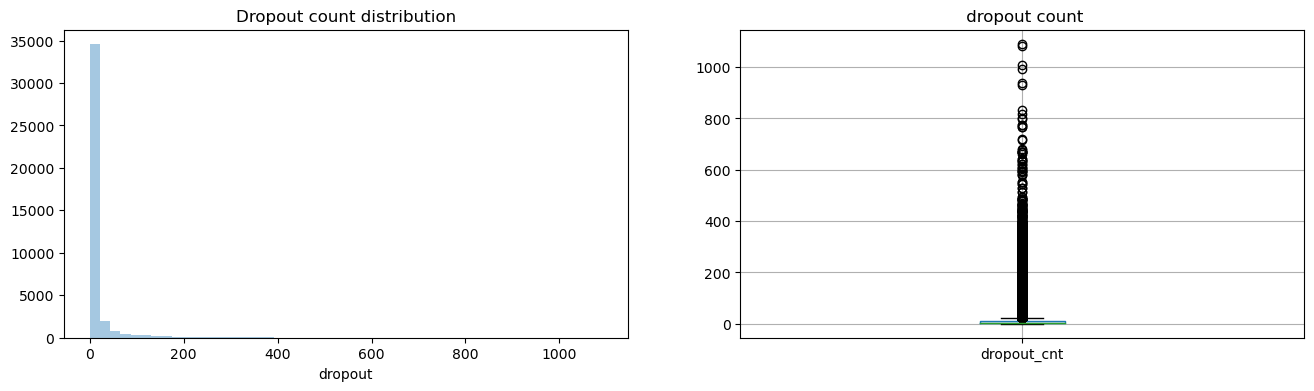

In [17]:

plott=df[df['dropout_cnt'].notnull()]['dropout_cnt']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(plott, kde=False);
plt.title("Dropout count distribution");
plt.xlabel('dropout')


plt.subplot(1, 2, 2)
#plt.ylabel('mg/L')
df.boxplot(column='dropout_cnt');
plt.title(" dropout count");

Density in Lower Range: The high density of counts in the lower range indicates that a significant proportion of instances exhibit lower counts, which might represent normal or typical behavior in the context of the dataset.

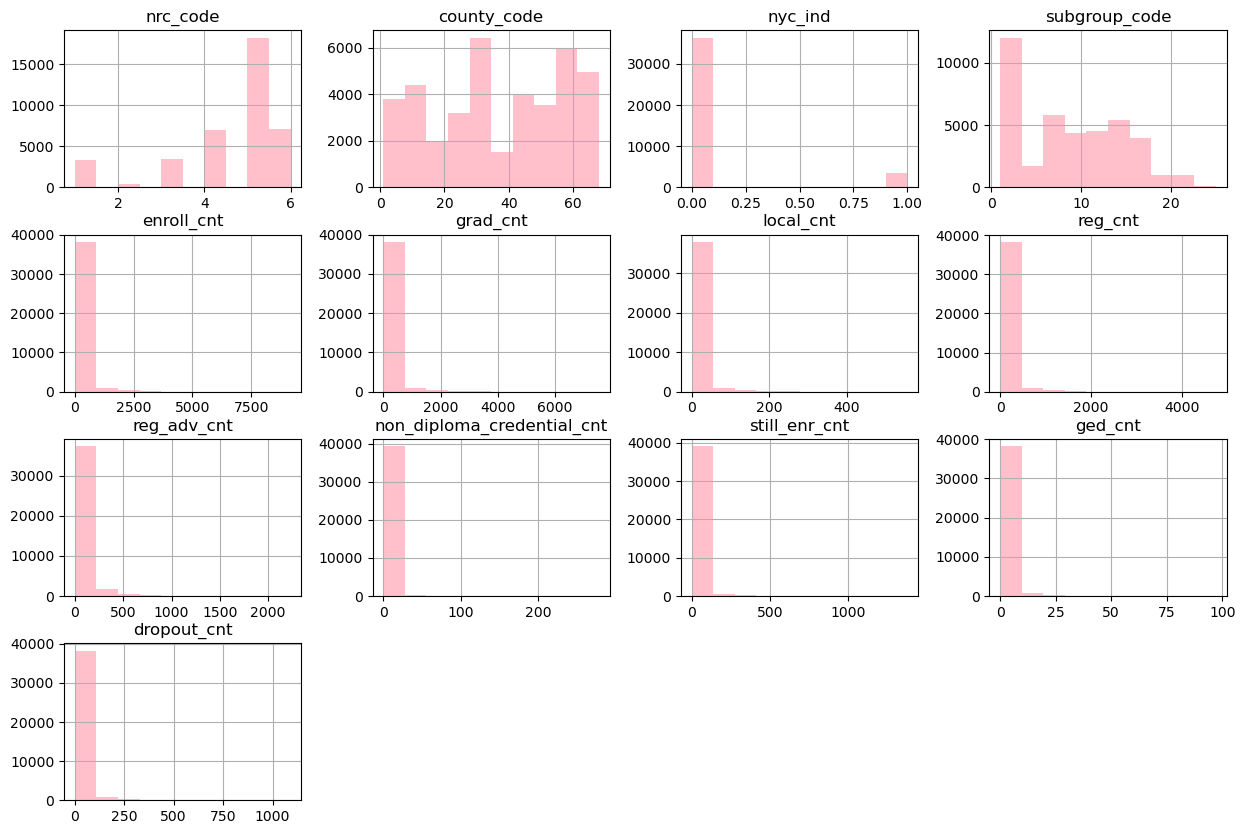

In [18]:
df[df.columns].hist(figsize=(15,10), color='pink');

major distribution looks as the target vairable

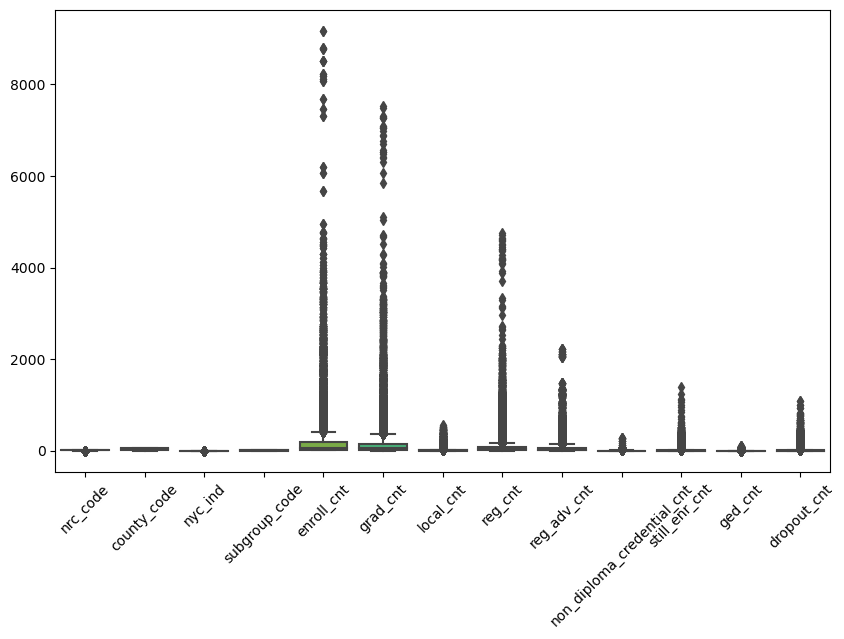

In [19]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [20]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\admin\AppData\Local\Temp\ipykernel_21940\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
nrc_code,1.000000,0.155745,-0.771826,-0.085670,-0.419656,-0.376972,-0.493489,-0.444701,-0.150416,-0.358429,-0.445393,-0.433131,-0.514003
county_code,0.155745,1.000000,-0.061661,0.005875,-0.009123,-0.001498,-0.019260,0.000336,0.000001,-0.044201,-0.020422,-0.049946,-0.041745
nyc_ind,-0.771826,-0.061661,1.000000,0.055672,0.507894,0.479326,0.527457,0.517293,0.297282,0.385218,0.482243,0.481667,0.513289
subgroup_code,-0.085670,0.005875,0.055672,1.000000,0.029509,0.024988,0.039884,0.029608,0.008017,0.026863,0.037364,0.028800,0.042167
enroll_cnt,-0.419656,-0.009123,0.507894,0.029509,1.000000,0.993603,0.831018,0.979747,0.836960,0.511030,0.762840,0.814510,0.846691
grad_cnt,-0.376972,-0.001498,0.479326,0.024988,0.993603,1.000000,0.790687,0.971027,0.878928,0.478744,0.708722,0.783183,0.795895
local_cnt,-0.493489,-0.019260,0.527457,0.039884,0.831018,0.790687,1.000000,0.817128,0.520575,0.587427,0.701385,0.767464,0.871071
reg_cnt,-0.444701,0.000336,0.517293,0.029608,0.979747,0.971027,0.817128,1.000000,0.744442,0.515351,0.737750,0.820034,0.851021
reg_adv_cnt,-0.150416,0.000001,0.297282,0.008017,0.836960,0.878928,0.520575,0.744442,1.000000,0.284526,0.504600,0.551338,0.508226
non_diploma_credential_cnt,-0.358429,-0.044201,0.385218,0.026863,0.511030,0.478744,0.587427,0.515351,0.284526,1.000000,0.333619,0.474265,0.584549


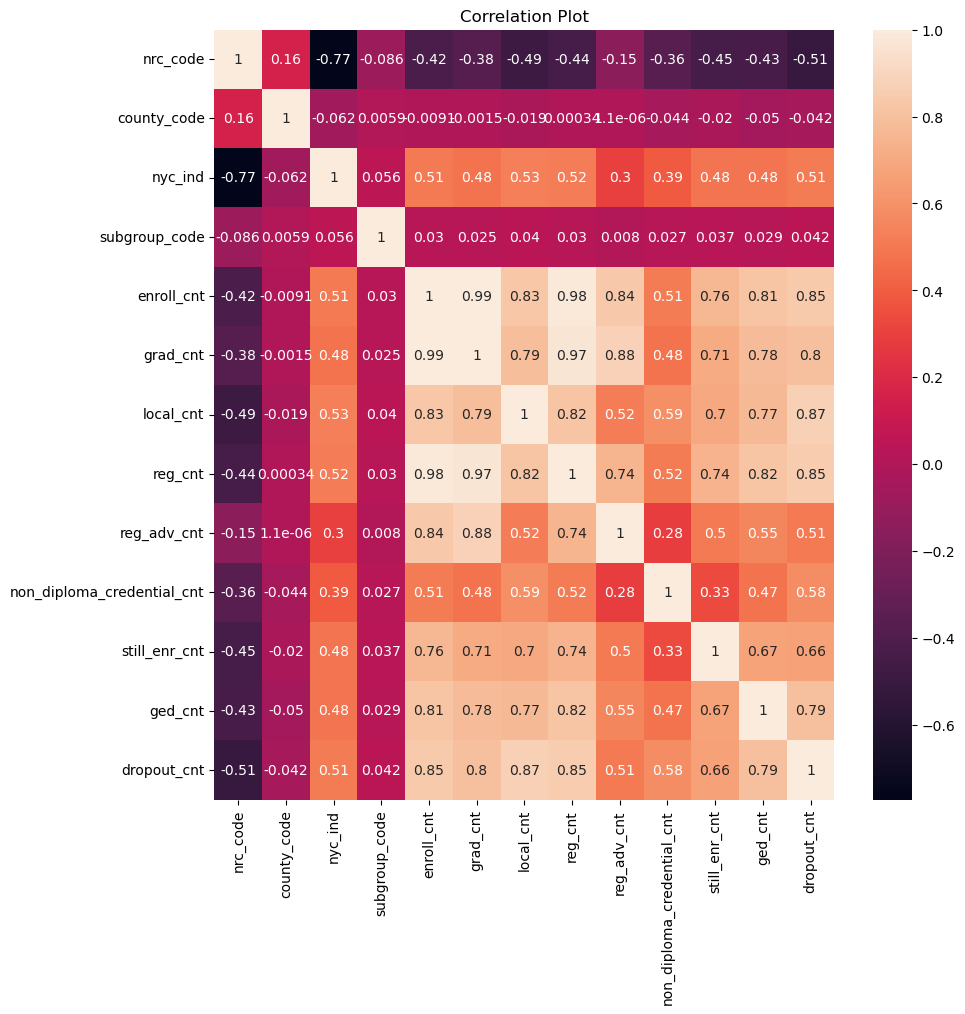

In [21]:
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(correlation_matrix,annot=True)
plt.show()

All the count variable has a strong relationship with the target variable

County name and county code have same information about the area of the school so we will drop county name and keep county code

In [22]:
df.drop(columns='county_name',inplace=True)

subgroup name and subgroup code have same information about the type of group so we will drop subgroup name and keep  code

In [23]:
df.drop(columns='subgroup_name',inplace=True)

nrc name and nrc code have same information about the  type of school district so we will drop nrc name and keep code

In [24]:
df.drop(columns='nrc_desc',inplace=True)

In [25]:
#df.head()

In [26]:
#df['nyc_ind'] = df['nyc_ind'].astype(int)

In [27]:

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['membership_desc'])

# Concatenate the one-hot encoded columns with your original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original "nrc_desc" column as it's no longer needed
df_encoded.drop('membership_desc', axis=1, inplace=True)


In [28]:
df_encoded.head()

,aggregation_name,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,1,658,464,63,310,91,16,30,0,148,1,0,0,0,0,0
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2,324,246,30,169,47,2,11,0,65,1,0,0,0,0,0
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,3,334,218,33,141,44,14,19,0,83,1,0,0,0,0,0
3,ALBANY CITY SCHOOL DISTRICT,3,1,0,5,367,248,42,183,23,10,18,0,91,1,0,0,0,0,0
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,6,98,58,13,40,5,4,8,0,28,1,0,0,0,0,0


we will also drop the aggregation_name column it has too many unique value and its explaniable from the other columns

In [29]:
df_encoded.drop(columns='aggregation_name',inplace=True)

In [30]:
df_encoded.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
0,3,1,0,1,658,464,63,310,91,16,30,0,148,1,0,0,0,0,0
1,3,1,0,2,324,246,30,169,47,2,11,0,65,1,0,0,0,0,0
2,3,1,0,3,334,218,33,141,44,14,19,0,83,1,0,0,0,0,0
3,3,1,0,5,367,248,42,183,23,10,18,0,91,1,0,0,0,0,0
4,3,1,0,6,98,58,13,40,5,4,8,0,28,1,0,0,0,0,0


<div>
  <h2>Post-Data Prep Changes</h2>
  <p>After completing the data preparation steps, several changes were observed in the dataset, enhancing its suitability for machine learning:</p>
  <ul>
    <li><strong>Data Type Changes:</strong> The data types of certain columns were modified to ensure compatibility with machine learning algorithms. For example, categorical variables were encoded into numerical format, and numeric variables were converted to appropriate data types.</li>
    <li><strong>Encoding of Data:</strong> Categorical variables were encoded using techniques such as one-hot encoding or label encoding to convert them into a format that machine learning algorithms can process effectively. This ensures that categorical variables are represented appropriately in the model.</li>
    <li><strong>Handling Missing Data:</strong> Missing data points were identified and handled using techniques such as imputation or removal. Imputation methods were employed to fill missing values with suitable substitutes, while rows or columns with excessive missing data were dropped to maintain data integrity.</li>
    <li><strong>Completeness of Data:</strong> The dataset was evaluated to ensure completeness, with efforts made to fill in missing values or remove incomplete records. This step ensures that the dataset contains sufficient data points for meaningful analysis and model building.</li>
  </ul>
</div>


In [122]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674 entries, 0 to 39673
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   nrc_code                                          39674 non-null  int64
 1   county_code                                       39674 non-null  int64
 2   nyc_ind                                           39674 non-null  int64
 3   subgroup_code                                     39674 non-null  int64
 4   enroll_cnt                                        39674 non-null  int64
 5   grad_cnt                                          39674 non-null  int64
 6   local_cnt                                         39674 non-null  int64
 7   reg_cnt                                           39674 non-null  int64
 8   reg_adv_cnt                                       39674 non-null  int64
 9   non_diploma_credential_cnt             

we can see less features and correct data types

## Feature selection 1 - based on correlation


In [35]:


# Assuming df is your DataFrame containing the data

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Assuming 'target_variable' is the name of your target variable
target_correlation = correlation_matrix['dropout_cnt'].abs().sort_values(ascending=False)

# Set a threshold for correlation
threshold = 0.5

# Select features with correlation above the threshold
selected_features = target_correlation[target_correlation > threshold].index.tolist()

# Remove the target variable from selected features
selected_features.remove('dropout_cnt')

# Create a new DataFrame with selected features
selected_df1 = df_encoded[selected_features]
dataset1 = pd.concat([selected_df1, df_encoded['dropout_cnt']], axis=1)


In [36]:
selected_df1.columns

Index(['local_cnt', 'reg_cnt', 'enroll_cnt', 'grad_cnt', 'ged_cnt',
       'still_enr_cnt', 'non_diploma_credential_cnt', 'nrc_code', 'nyc_ind',
       'reg_adv_cnt'],
      dtype='object')

Based on the correlation analysis, the selected features for further analysis include:
'local_cnt', 'reg_cnt', 'enroll_cnt', 'grad_cnt', 'ged_cnt',
       'still_enr_cnt', 'non_diploma_credential_cnt', 'nrc_code', 'nyc_ind',
       'reg_adv_cnt'


These features are selected for their relatively high correlation with the target variable and their potential relevance to understanding dropout rates within the educational system. Further analysis and modeling can explore the predictive power of these features in more detail.

# Feature selection 2 - based on RFE


In [38]:
#selection features using recursive feature elimination (RFE)
from sklearn.linear_model import PoissonRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix and y is your target variable
# X should contain only numerical features
X = df_encoded.drop(columns=['dropout_cnt'])  # Assuming 'shares' is the target variable
y = df_encoded['dropout_cnt']

# Define the estimator (e.g., Linear Regression)
estimator  = PoissonRegressor()

# Define the number of features to select
n_features_to_select = 15  

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

dataset2=df_encoded[selected_features]
dataset2 = pd.concat([dataset2, df_encoded['dropout_cnt']], axis=1)


Selected Features:
Index(['subgroup_code', 'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
       'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt',
       '2013 Total Cohort - 6 Year Outcome',
       '2013 Total Cohort - 6 Year Outcome - August 2019',
       '2014 Total Cohort - 5 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome - August 2019'],
      dtype='object')


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


In [39]:
dataset2.rename(columns={
    '2013 Total Cohort - 6 Year Outcome': 'outcome_2013_6y',
    '2013 Total Cohort - 6 Year Outcome - August 2019': 'outcome_2013_6y_aug2019',
    '2014 Total Cohort - 5 Year Outcome': 'outcome_2014_5y',
    '2014 Total Cohort - 5 Year Outcome - August 2019': 'outcome_2014_5y_aug2019',
    '2015 Total Cohort - 4 Year Outcome': 'outcome_2015_4y',
    '2015 Total Cohort - 4 Year Outcome - August 2019': 'outcome_2015_4y_aug2019'
}, inplace=True)

These variables likely represent outcomes or achievements of cohorts of students over different time periods, providing historical context for dropout rates.

These features have been selected by RFE as the most predictive for the given target variable and can be further explored in modeling and analysis tasks.

## Feature selection 3  - decision tree 


In [40]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming df is your DataFrame containing the data
# Assuming 'target_variable' is the name of your target variable

# Drop the target variable from the DataFrame
X = df_encoded.drop(columns=['dropout_cnt'])
y = df_encoded['dropout_cnt']

# Initialize a decision tree classifier
tree = DecisionTreeClassifier()

# Fit the model
tree.fit(X, y)

# Get feature importances
importances = tree.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame(importances, index=X.columns, columns=['Importance'])

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top features based on importance
num_features_to_select = 10  # Specify the number of top features to select
selected_features = feature_importance_df.head(num_features_to_select).index.tolist()

# Create a new DataFrame with selected features
selected_df = df_encoded[selected_features]
dataset3 = pd.concat([selected_df, df_encoded['dropout_cnt']], axis=1)

In [41]:
dataset3.columns

Index(['enroll_cnt', 'grad_cnt', 'reg_cnt', 'county_code', 'reg_adv_cnt',
       'still_enr_cnt', 'local_cnt', 'non_diploma_credential_cnt',
       'subgroup_code', 'ged_cnt', 'dropout_cnt'],
      dtype='object')

## poission_regression for dataset1

<b>Summary of steps for performing Poisson Regression </b><br>


 1 First, make sure that your data set contains counts. One way to tell is that it contains only non-negative integer values that represent the number of occurrences of some event during some interval. <br>

2 Carve out a training data set that your regression model will train on, and a test data set that should keep aside. Do not     train the model on the test data.
3 Use a suitable statistical software such as the Python statsmodels package to configure and fit the Poisson Regression model on the training data set.<br>
4 Test the performance of the model by running it on the test data set so as to generate predicted counts. Compare them with the actual counts in the test data set. <br>
5 Use a goodness-of-fit measure to determine how well your model has trained on the training data set.<br>

In [42]:
#Let’s create the training and testing data sets.

mask = np.random.rand(len(df)) < 0.8
df_train = dataset1[mask]
df_test = dataset1[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=31788
Testing data set length=7886


In [43]:
dataset1.columns

Index(['local_cnt', 'reg_cnt', 'enroll_cnt', 'grad_cnt', 'ged_cnt',
       'still_enr_cnt', 'non_diploma_credential_cnt', 'nrc_code', 'nyc_ind',
       'reg_adv_cnt', 'dropout_cnt'],
      dtype='object')

In [44]:
expr1 = """(dropout_cnt ~  enroll_cnt + grad_cnt + local_cnt + reg_cnt + reg_adv_cnt + non_diploma_credential_cnt + still_enr_cnt + ged_cnt +nrc_code +nyc_ind )"""


In [45]:
y_train, X_train = dmatrices(expr1, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr1, df_test, return_type='dataframe')


In [46]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.

poisson_training_results1 = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [49]:
#Print the training summary.

print(poisson_training_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31788
Model:                            GLM   Df Residuals:                    31778
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2679e+05
Date:                Sun, 25 Feb 2024   Deviance:                   3.6128e+05
Time:                        12:26:30   Pearson chi2:                 4.17e+05
No. Iterations:                    20   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [53]:
poisson_predictions = poisson_training_results1.get_prediction(X_test)

In [54]:
predictions_summary_frame = poisson_predictions.summary_frame()
#print(predictions_summary_frame)

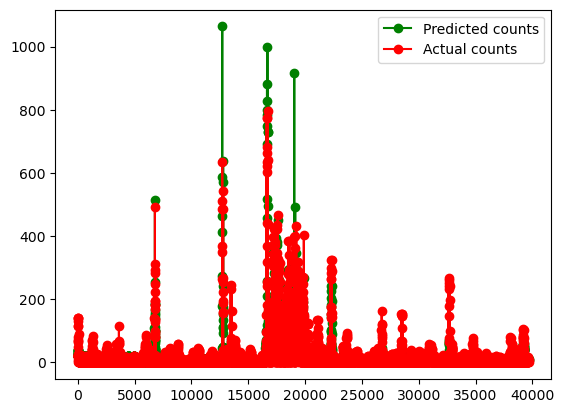

In [55]:
#Mlot the predicted counts versus the actual counts for the test data.
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['dropout_cnt']

fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()



<Figure size 640x480 with 0 Axes>

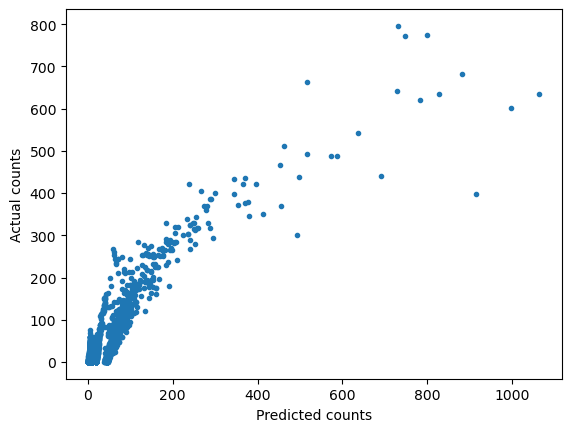

In [56]:
 #Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
#fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

<b> Comments on model 1 </b><br>
Overall, the model seems to have achieved a relatively high log-likelihood value, indicating a good fit to the data. However, the deviance and Pearson chi-square values suggest that there may still be room for improvement in the model's fit, potentially through further refinement or adjustments.

## poission_regression for dataset2

In [57]:
mask = np.random.rand(len(df)) < 0.8
df_train2 = dataset2[mask]
df_test2 = dataset2[~mask]
print('Training data set length='+str(len(df_train2)))
print('Testing data set length='+str(len(df_test2)))

Training data set length=31631
Testing data set length=8043


In [58]:
# #applying PCA before
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)  # Choose the number of components
# X_train_pca = pca.fit_transform(df_train2)
# X_test_pca = pca.transform(df_test2)

In [59]:
dataset2.columns

Index(['subgroup_code', 'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
       'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt',
       'outcome_2013_6y', 'outcome_2013_6y_aug2019', 'outcome_2014_5y',
       'outcome_2014_5y_aug2019', 'outcome_2015_4y', 'outcome_2015_4y_aug2019',
       'dropout_cnt'],
      dtype='object')

In [60]:
expr = """(dropout_cnt ~subgroup_code + enroll_cnt + grad_cnt+ local_cnt + reg_cnt +
       reg_adv_cnt+ non_diploma_credential_cnt+ still_enr_cnt+ ged_cnt +
       outcome_2013_6y + outcome_2013_6y_aug2019 + outcome_2014_5y +
       outcome_2014_5y_aug2019 + outcome_2015_4y + outcome_2015_4y_aug2019 
       )"""

In [61]:
y_train2, X_train2 = dmatrices(expr, df_train2, return_type='dataframe')
y_test2, X_test2 = dmatrices(expr, df_test2, return_type='dataframe')

In [62]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.

poisson_training_results2 = sm.GLM(y_train2, X_train2, family=sm.families.Poisson()).fit()

In [63]:
#Print the training summary.

print(poisson_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31631
Model:                            GLM   Df Residuals:                    31617
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8597e+05
Date:                Sun, 25 Feb 2024   Deviance:                   6.7988e+05
Time:                        12:26:49   Pearson chi2:                 9.19e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [64]:
poisson_predictions = poisson_training_results2.get_prediction(X_test2)

In [65]:
predictions_summary_frame = poisson_predictions.summary_frame()

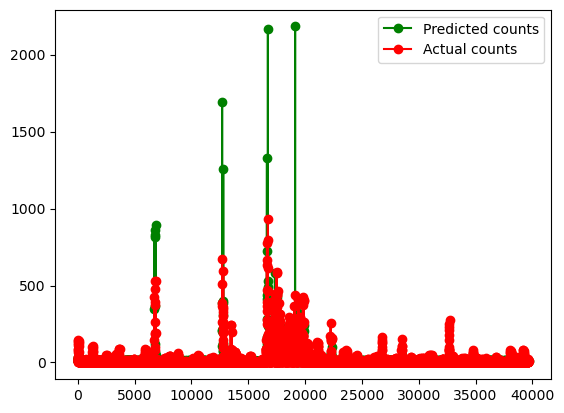

In [66]:
#Mlot the predicted counts versus the actual counts for the test data.
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test2['dropout_cnt']

fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test2.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test2.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 640x480 with 0 Axes>

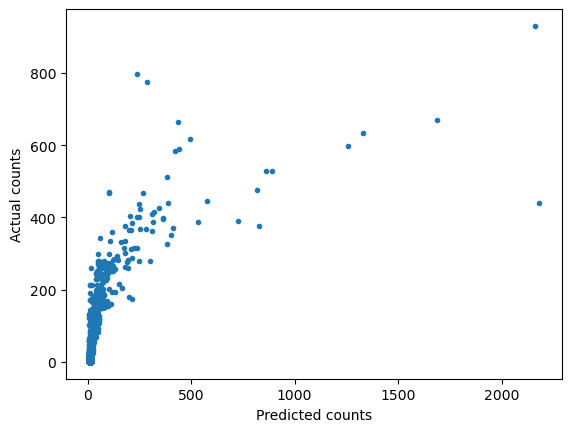

In [67]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
#fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

<b> comment on model 2 </b> <br>
the deviance value of approximately 6.7988e+05 for this model is actually higher than the deviance value of 3.6128e+05 for the other model. A lower deviance value indicates a better fit of the model to the data. Therefore, in this case, the other model has a lower deviance, suggesting a better fit compared to this model.

## negative bionominial dataset 1

Summary of NB2 regression strategy
STEP 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates λ.<br>
STEP 2: Fit the aux OLS regression model on the data set. This will give us the value of α.<br>
STEP 3: Use the α from STEP 2 to fit the NB2 regression model to the data set.<br>
STEP 4: Use the fitted NB2 model to make predictions about expected counts on the test data set.<br>
STEP 5: Test the goodness-of-fit of the NB2 model.<br>

In [68]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [69]:
mask = np.random.rand(len(df)) < 0.8
df_train3 = dataset1[mask]
df_test3 = dataset1[~mask]
print('Training data set length='+str(len(df_train3)))
print('Testing data set length='+str(len(df_test3)))

Training data set length=31730
Testing data set length=7944


In [70]:
y_train3, X_train3 = dmatrices(expr1, df_train3, return_type='dataframe')
y_test3, X_test3 = dmatrices(expr1, df_test3, return_type='dataframe')


In [71]:
poisson_training_results3 = sm.GLM(y_train3, X_train3, family=sm.families.Poisson()).fit()

In [72]:
print(poisson_training_results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31730
Model:                            GLM   Df Residuals:                    31720
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2242e+05
Date:                Sun, 25 Feb 2024   Deviance:                   3.5282e+05
Time:                        12:26:50   Pearson chi2:                 4.07e+05
No. Iterations:                    25   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [73]:
#Our real interest lies in the vector of fitted rates λ produced by the training. 
#This rate vector is contained in the parameter poisson_training_results.mu.

print(poisson_training_results3.mu)
print(len(poisson_training_results3.mu))

[42.70623702 25.91066828 31.20289514 ...  9.66617038  9.63144145
  9.3634903 ]
31730


STEP 2: We will now fit the auxiliary OLS regression model on the data set and use the fitted model to get the value of α.

In [74]:
import statsmodels.formula.api as smf

In [75]:
df_train3['dropout_cnt_lambda'] = poisson_training_results3.mu

C:\Users\admin\AppData\Local\Temp\ipykernel_21940\390893052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train3['dropout_cnt_lambda'] = poisson_training_results3.mu


ext, let’s add a derived column called ‘drop_cnt_DEP’ to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression. It is the left hand side of the OLS regression equation below:

In [76]:
df_train3['drop_cnt_DEP'] = df_train3.apply(lambda x: ((x['dropout_cnt_lambda'] - x['dropout_cnt_lambda'])**2 - x['dropout_cnt_lambda']) / x['dropout_cnt_lambda'], axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_21940\214588886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train3['drop_cnt_DEP'] = df_train3.apply(lambda x: ((x['dropout_cnt_lambda'] - x['dropout_cnt_lambda'])**2 - x['dropout_cnt_lambda']) / x['dropout_cnt_lambda'], axis=1)


In [77]:
ols_expr = """drop_cnt_DEP ~ dropout_cnt_lambda - 1"""

In [78]:
#We are now ready to fit an OLSR model.

#Configure and fit the OLSR model:

drop_cnt_results = smf.ols(ols_expr, df_train3).fit()

In [79]:
#Print the regression params:

print(drop_cnt_results.params)

dropout_cnt_lambda   -0.003801
dtype: float64


In [80]:
#The OLSResults object contains the t-score of the regression coefficient α. Let’s print it out:
drop_cnt_results.tvalues

dropout_cnt_lambda   -45.27751
dtype: float64

STEP 3: We supply the value of alpha found in STEP 2 into the statsmodels.genmod.families.family.NegativeBinomial class, and train the NB2 model on the training data set.

This is a one-step operation in statsmodels:

In [81]:
nb2_training_results = sm.GLM(y_train3, X_train3,family=sm.families.NegativeBinomial(alpha=0.00377)).fit()


In [82]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31730
Model:                            GLM   Df Residuals:                    31720
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8770e+05
Date:                Sun, 25 Feb 2024   Deviance:                   2.8182e+05
Time:                        12:26:52   Pearson chi2:                 3.05e+05
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [83]:
#STEP 4: Let’s make some predictions using our trained NB2 model.
#Prediction is again a single-step procedure in statsmodels:

nb2_predictions = nb2_training_results.get_prediction(X_test3)

In [84]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31730
Model:                            GLM   Df Residuals:                    31720
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8770e+05
Date:                Sun, 25 Feb 2024   Deviance:                   2.8182e+05
Time:                        12:26:52   Pearson chi2:                 3.05e+05
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [85]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

               mean     mean_se  mean_ci_lower  mean_ci_upper
4         19.892775    0.061261      19.773067      20.013208
6         18.502257    0.059153      18.386681      18.618559
12        30.601181    0.098223      30.409271      30.794302
14        47.815546    0.167064      47.489226      48.144109
26        15.808750    0.051591      15.707956      15.910191
27        27.124731    0.083804      26.960974      27.289482
31        41.731636    0.148273      41.442035      42.023261
33        28.008967    0.092980      27.827322      28.191798
36        17.259450    0.055409      17.151192      17.368391
42        15.804531    0.051755      15.703418      15.906296
44        23.161761    0.074220      23.016747      23.307688
46        39.868106    0.138020      39.598507      40.139540
51        18.418621    0.057982      18.305328      18.532615
54        33.604648    0.111257      33.387294      33.823416
60        27.081260    0.084587      26.915979      27.247557
62      

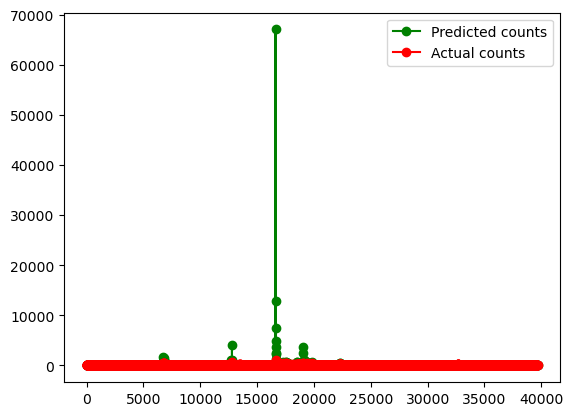

In [86]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test3['dropout_cnt']
fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test3.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test3.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<b> comment on model 3 </b> <br>
The negative binomial regression model with a log-likelihood of approximately -1.8770e+05 and a deviance of approximately 2.8182e+05 suggests a reasonable fit to the data. The Pearson chi-squared statistic of approximately 3.05e+05 indicates the goodness of fit, with lower values indicating better fit. Overall, the model appears to provide a satisfactory explanation of the relationship between the predictor variables and the response variable in the data.

#remaining work
dataset 2 - negative binomial
 
multiple linear regression

## negative bionomial for dataset3

In [87]:
mask = np.random.rand(len(df)) < 0.8
df_train4 = dataset3[mask]
df_test4 = dataset3[~mask]
print('Training data set length='+str(len(df_train4)))
print('Testing data set length='+str(len(df_test4)))

Training data set length=31675
Testing data set length=7999


In [88]:
expr3 = """dropout_cnt ~ enroll_cnt + grad_cnt + reg_cnt + reg_adv_cnt + county_code + still_enr_cnt + local_cnt + subgroup_code + non_diploma_credential_cnt + ged_cnt"""

In [89]:
y_train4, X_train4 = dmatrices(expr3, df_train4, return_type='dataframe')
y_test4, X_test4 = dmatrices(expr3, df_test4, return_type='dataframe')

In [90]:
poisson_training_results4 = sm.GLM(y_train4, X_train4, family=sm.families.Poisson()).fit()

In [91]:
print(poisson_training_results4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31675
Model:                            GLM   Df Residuals:                    31665
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8491e+05
Date:                Sun, 25 Feb 2024   Deviance:                   6.7788e+05
Time:                        12:26:53   Pearson chi2:                 9.19e+05
No. Iterations:                    36   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [92]:
#Our real interest lies in the vector of fitted rates λ produced by the training. 
#This rate vector is contained in the parameter poisson_training_results.mu.

print(poisson_training_results4.mu)
print(len(poisson_training_results4.mu))

[22.03761704 13.47929617 10.95874396 ... 10.92303474 11.5516589
 11.29574171]
31675


In [93]:
df_train4['dropout_cnt_lambda'] = poisson_training_results4.mu

C:\Users\admin\AppData\Local\Temp\ipykernel_21940\2649709694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train4['dropout_cnt_lambda'] = poisson_training_results4.mu


In [94]:
df_train4['drop_cnt_DEP'] = df_train4.apply(lambda x: ((x['dropout_cnt_lambda'] - x['dropout_cnt_lambda'])**2 - x['dropout_cnt_lambda']) / x['dropout_cnt_lambda'], axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_21940\2431722361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train4['drop_cnt_DEP'] = df_train4.apply(lambda x: ((x['dropout_cnt_lambda'] - x['dropout_cnt_lambda'])**2 - x['dropout_cnt_lambda']) / x['dropout_cnt_lambda'], axis=1)


In [95]:
ols_expr = """drop_cnt_DEP ~ dropout_cnt_lambda - 1"""

In [96]:
#We are now ready to fit an OLSR model.

#Configure and fit the OLSR model:

drop_cnt_results = smf.ols(ols_expr, df_train4).fit()

In [97]:

print(drop_cnt_results.params)#Print the regression params:



dropout_cnt_lambda   -0.002273
dtype: float64


In [98]:
drop_cnt_results.tvalues

dropout_cnt_lambda   -34.754773
dtype: float64

In [99]:
nb2_training_results = sm.GLM(y_train4, X_train4,family=sm.families.NegativeBinomial(alpha=0.002272)).fit()


In [100]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31675
Model:                            GLM   Df Residuals:                    31665
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9796e+05
Date:                Sun, 25 Feb 2024   Deviance:                   5.0297e+05
Time:                        12:26:55   Pearson chi2:                 5.03e+05
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [101]:
#STEP 4: Let’s make some predictions using our trained NB2 model.
#Prediction is again a single-step procedure in statsmodels:

nb2_predictions = nb2_training_results.get_prediction(X_test4)

In [102]:
predictions_summary_frame = nb2_predictions.summary_frame()

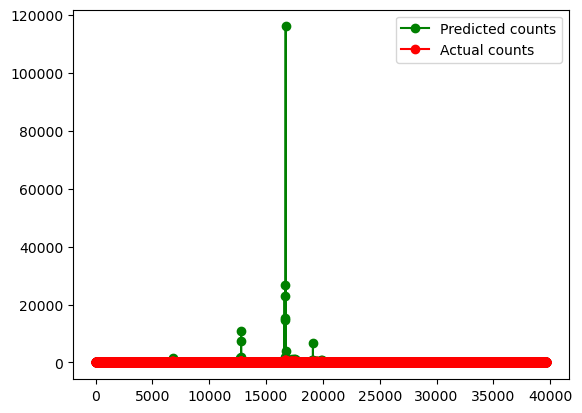

In [103]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test4['dropout_cnt']
fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test4.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test4.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<b> comment on model 4 </b> <br>
The negative binomial regression model has a log-likelihood of approximately -2.9796e+05, a deviance of approximately 5.0297e+05, and a Pearson chi-squared statistic of approximately 5.03e+05. These metrics suggest that the model's fit to the data may not be optimal, indicating potential limitations or shortcomings of the model. Further analysis and model refinement may be needed to improve its performance

## Multiple linear rgression dataset 1

In [104]:

mask = np.random.rand(len(df)) < 0.8
df_train5 = dataset1[mask]
df_test5 = dataset1[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=31788
Testing data set length=7886


In [105]:
y_train5, X_train5 = dmatrices(expr1, df_train5, return_type='dataframe')
y_test5, X_test5 = dmatrices(expr1, df_test5, return_type='dataframe')



In [106]:

# Step 3: Fit the Model
model = sm.GLM(y_train5, X_train5, family=sm.families.Poisson()).fit()

# Step 4: Evaluate Model
print(model.summary())

# Predict on test set
#y_pred = model.predict(X_test)

# Evaluate model performance
# For example, calculate Mean Squared Error
#mse = ((y_pred - y_test) ** 2).mean()
#print("Mean Squared Error:", mse)


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31716
Model:                            GLM   Df Residuals:                    31706
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2242e+05
Date:                Sun, 25 Feb 2024   Deviance:                   3.5268e+05
Time:                        12:26:56   Pearson chi2:                 4.07e+05
No. Iterations:                    18   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [107]:
poisson_predictions = model.get_prediction(X_test5)

In [108]:
predictions_summary_frame = poisson_predictions.summary_frame()

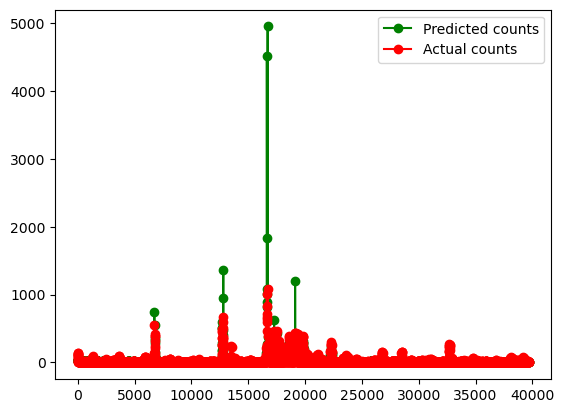

In [109]:
#Mlot the predicted counts versus the actual counts for the test data.
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test5['dropout_cnt']

fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test5.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test5.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<b> comment on model 5 </b> <br>
The log-likelihood of approximately -2.2242e+05 indicates the overall likelihood of the observed data given the model's parameters. A higher log-likelihood suggests a better fit of the model to the data.

The deviance of approximately 3.5268e+05 represents a measure of the difference between the observed values and the values predicted by the model. A lower deviance indicates a better fit of the model to the data.

The Pearson chi-squared statistic of approximately 4.07e+05 measures the discrepancy between the observed frequencies and the frequencies expected under the model. A lower chi-squared value suggests a better agreement between the observed and expected frequencies.

Overall, while the model's log-likelihood indicates a reasonable fit to the data, the relatively high deviance and Pearson chi-squared statistic suggest that there may still be room for improvement in the model's performance. Further evaluation and refinement may be necessary to enhance the model's predictive accuracy.

# Multiple linear rgression dataset 2


In [110]:
mask = np.random.rand(len(df)) < 0.8
df_train6 = dataset2[mask]
df_test6 = dataset2[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=31788
Testing data set length=7886


In [111]:
y_train6, X_train6 = dmatrices(expr, df_train6, return_type='dataframe')
y_test6, X_test6 = dmatrices(expr, df_test6, return_type='dataframe')



In [112]:
# Step 3: Fit the Model
model = sm.GLM(y_train6, X_train6, family=sm.families.Poisson()).fit()

# Step 4: Evaluate Model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31689
Model:                            GLM   Df Residuals:                    31675
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8518e+05
Date:                Sun, 25 Feb 2024   Deviance:                   6.7796e+05
Time:                        12:26:57   Pearson chi2:                 9.10e+05
No. Iterations:                    39   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [113]:
poisson_predictions = model.get_prediction(X_test6)

In [114]:
predictions_summary_frame = poisson_predictions.summary_frame()

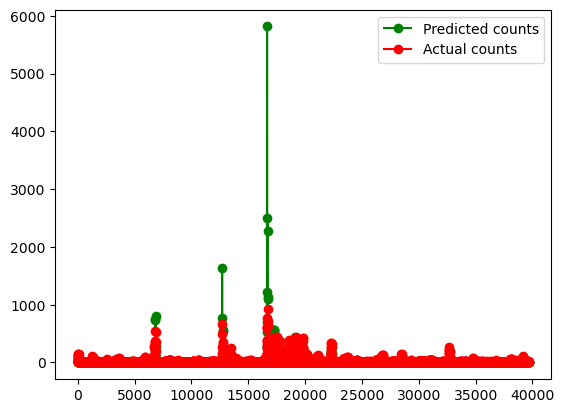

In [115]:
#Mlot the predicted counts versus the actual counts for the test data.
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test6['dropout_cnt']

fig = plt.figure()
#fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test6.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test6.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<b> comment on model 6 </b> <br>
he model's log-likelihood, standing at approximately -3.8518e+05, suggests a moderate likelihood of the observed data given the model's parameters. However, the relatively high deviance of around 6.7796e+05 and Pearson chi-squared statistic of about 9.10e+05 indicate a notable discrepancy between the observed values and those predicted by the model. This misalignment suggests that the model may not fully capture the underlying patterns in the data. Thus, while the model shows some promise, there remains room for improvement to enhance its predictive accuracy and better align it with the observed data trends.

## selection of final model

<table border="1" cellspacing="0" cellpadding="5">
  <tr>
    <th>Model</th>
    <th>Log-Likelihood</th>
    <th>Deviance</th>
    <th>Pearson chi2</th>
  </tr>
  <tr>
    <td>Poisson Regression</td>
    <td>-2.2679e+05</td>
    <td>3.6128e+05</td>
    <td>4.17e+05</td>
  </tr>
  <tr>
    <td>Poisson Regression (Alternate)</td>
    <td>-3.8597e+05</td>
    <td>6.7988e+05</td>
    <td>9.19e+05</td>
  </tr>
  <tr>
    <td>Negative Binomial Regression</td>
    <td>-1.8770e+05</td>
    <td>2.8182e+05</td>
    <td>3.05e+05</td>
  </tr>
  <tr>
    <td>Negative Binomial Regression (Alternate)</td>
    <td>-2.9796e+05</td>
    <td>5.0297e+05</td>
    <td>5.03e+05</td>
  </tr>
  <tr>
    <td>Multiple Linear Regression</td>
    <td>-2.2242e+05</td>
    <td>3.5268e+05</td>
    <td>4.07e+05</td>
  </tr>
  <tr>
    <td>Multiple Linear Regression (Alternate)</td>
    <td>-3.8518e+05</td>
    <td>6.7796e+05</td>
    <td>9.10e+05</td>
  </tr>
</table>
<p>Based on these values, we can make the following observations:</p>
<ul>
  <li><strong>Poisson Regression Models:</strong> Model 1 has a higher log-likelihood and lower deviance compared to Model 2, indicating a better fit to the data.</li>
  <li><strong>Negative Binomial Regression Models:</strong> Model 3 has a higher log-likelihood and lower deviance compared to Model 4, suggesting a better fit.</li>
  <li><strong>Multiple Linear Regression Models:</strong> Model 5 outperforms Model 6 in terms of log-likelihood and deviance.</li>
</ul>
<p>Considering these observations, the preferred models would be Model 1 for Poisson regression, Model 3 for Negative Binomial regression, and Model 5 for Multiple Linear Regression, as they exhibit better fit statistics compared to their alternate counterparts.</p>







# final model selected

<div>
  <h3>Model 3 - Negative Binomial Regression</h3>
  <p><strong>Here's the rationale behind this choice:</strong></p>
  <ul>
    <li><strong>Better Fit:</strong> Model 3 has a higher log-likelihood and lower deviance compared to Model 4, indicating a better fit to the data.</li>
    <li><strong>Overdispersion Handling:</strong> Negative Binomial Regression is suitable when there is overdispersion in the data, meaning the variance is greater than the mean. This model accounts for the variability in the response variable better than Poisson regression, which assumes equal mean and variance.</li>
    <li><strong>Flexibility:</strong> Negative Binomial Regression offers flexibility in modeling count data, allowing for a broader range of variance structures compared to Poisson regression.</li>
    <li><strong>Interpretability:</strong> While Negative Binomial Regression introduces a dispersion parameter, the interpretation of coefficients remains similar to Poisson Regression, making it relatively easy to interpret the results.</li>
  </ul>
  <p>Overall, Model 3 provides a better balance between model fit, flexibility, and interpretability, making it a suitable choice for count data analysis, especially when overdispersion is present.</p>
</div>


<div>
  <h2>Overall Conclusion</h2>
  <p>After thorough exploration and analysis of the dataset, the following conclusions can be drawn:</p>
  <ul>
    <li>The dataset consists of count data related to various educational outcomes, demographic factors, and geographic indicators.</li>
    <li>Initial data exploration revealed that most count values fall within the range of 0-200, with a decreasing trend observed towards higher counts.</li>
    <li>Feature selection was performed using various techniques such as correlation analysis, recursive feature elimination (RFE), and domain knowledge.</li>
    <li>Multiple regression models, including Poisson regression, Negative Binomial regression, and Multiple Linear Regression, were constructed and evaluated.</li>
    <li>Based on model evaluation metrics such as log-likelihood, deviance, and Pearson chi-square, Model 3 - Negative Binomial Regression was selected as the preferred model.</li>
    <li>Model 3 exhibited superior fit to the data, effectively handled overdispersion, and provided interpretable results.</li>
  </ul>
  <p>In conclusion, the Negative Binomial Regression model offers a robust framework for analyzing count data, providing insights into educational outcomes while considering the variability inherent in the data. This project highlights the importance of selecting appropriate regression models and techniques for count data analysis, ultimately aiding in decision-making processes in educational contexts.</p>
</div>
